<a href="https://www.kaggle.com/code/arafa7/asl-alphabet-cnn-model?scriptVersionId=161487076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

**Importing data and concatenate all its content with its labels**

In [3]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

images = []
labels = []
size = 64,64

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): ## iterate over the big folder then go to the sub folders inside it
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

**Spliting the data for the training**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(X_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 69600 images for training, Train data shape = (69600, 64, 64, 3)
Loaded 17400 images for testing Test data shape = (17400, 29)


**The Model**

In [5]:
 model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(64, 64, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=29, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 128)       9728      
                                                                 
 activation (Activation)     (None, 60, 60, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [6]:
optimizer = Adam(learning_rate=0.001)

##while training if the validation loss increased in 5 epochs than the previous epoch
##the learing rate will decrease by rate: current lr * sqrt(0.1)
##to avoid overfitting
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [7]:
history = model.fit(X_train,Y_train, epochs=50, validation_split = 0.1,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
1958/1958 - 21s - loss: 1.1233 - accuracy: 0.6561 - val_loss: 0.7792 - val_accuracy: 0.7720 - lr: 0.0010 - 21s/epoch - 11ms/step
Epoch 2/50
1958/1958 - 14s - loss: 0.2954 - accuracy: 0.9031 - val_loss: 2.8165 - val_accuracy: 0.5158 - lr: 0.0010 - 14s/epoch - 7ms/step
Epoch 3/50
1958/1958 - 15s - loss: 0.1806 - accuracy: 0.9432 - val_loss: 0.2185 - val_accuracy: 0.9351 - lr: 0.0010 - 15s/epoch - 7ms/step
Epoch 4/50
1958/1958 - 15s - loss: 0.1392 - accuracy: 0.9584 - val_loss: 0.1138 - val_accuracy: 0.9658 - lr: 0.0010 - 15s/epoch - 7ms/step
Epoch 5/50
1958/1958 - 14s - loss: 0.1155 - accuracy: 0.9674 - val_loss: 1.2495 - val_accuracy: 0.7973 - lr: 0.0010 - 14s/epoch - 7ms/step
Epoch 6/50
1958/1958 - 15s - loss: 0.1023 - accuracy: 0.9733 - val_loss: 0.0789 - val_accuracy: 0.9813 - lr: 0.0010 - 15s/epoch - 7ms/step
Epoch 7/50
1958/1958 - 14s - loss: 0.0960 - accuracy: 0.9759 - val_loss: 0.0435 - val_accuracy: 0.9920 - lr: 0.0010 - 14s/epoch - 7ms/step
Epoch 8/50
1958/1958 - 14s

In [8]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

**Performance curves**

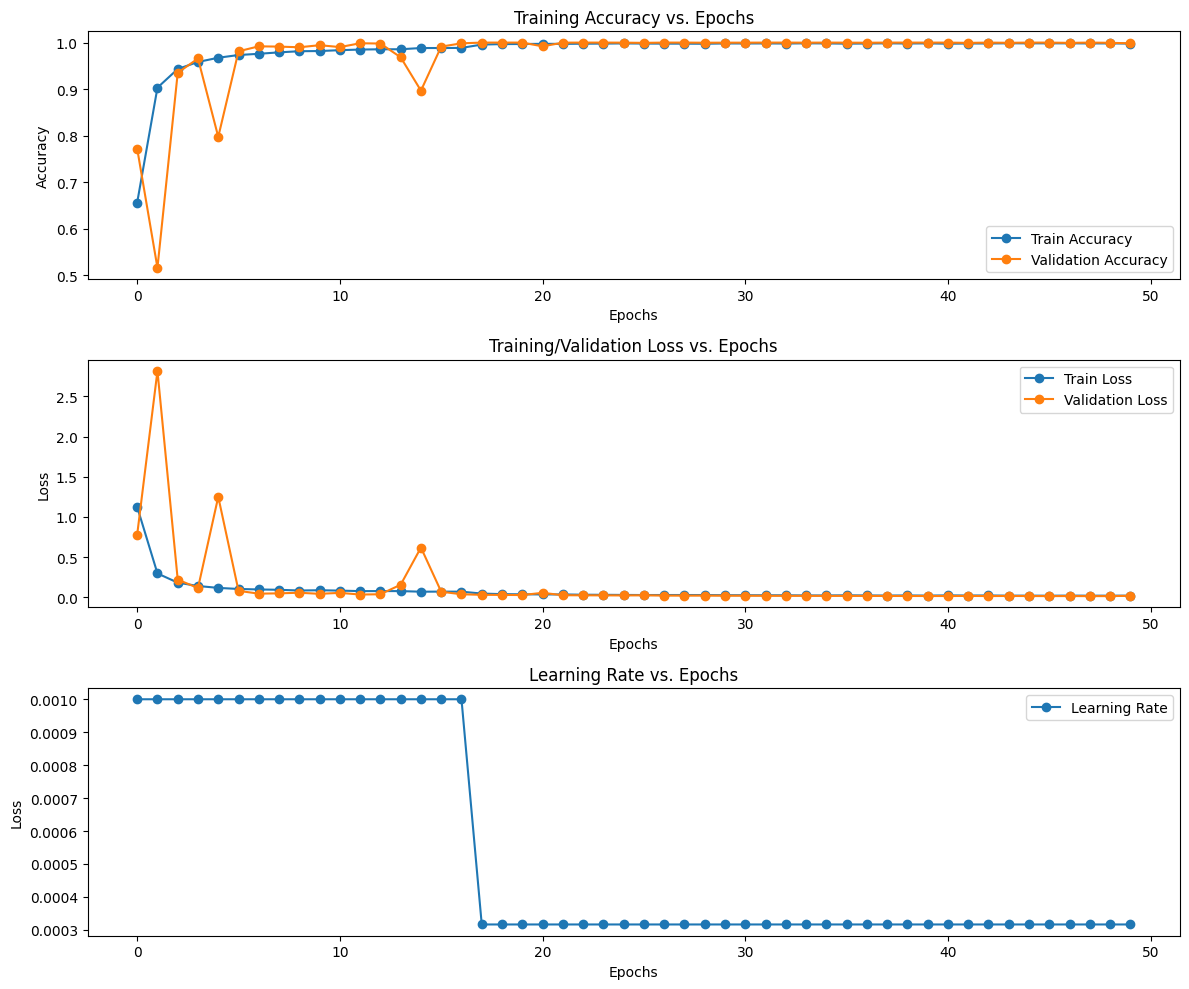

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test)

544/544 [==============================] - 2s 4ms/step - loss: 1.7898 - accuracy: 0.9969


In [11]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.7897963523864746
Test Accuracy: 0.9968965649604797


In [12]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

544/544 [==============================] - 1s 2ms/step


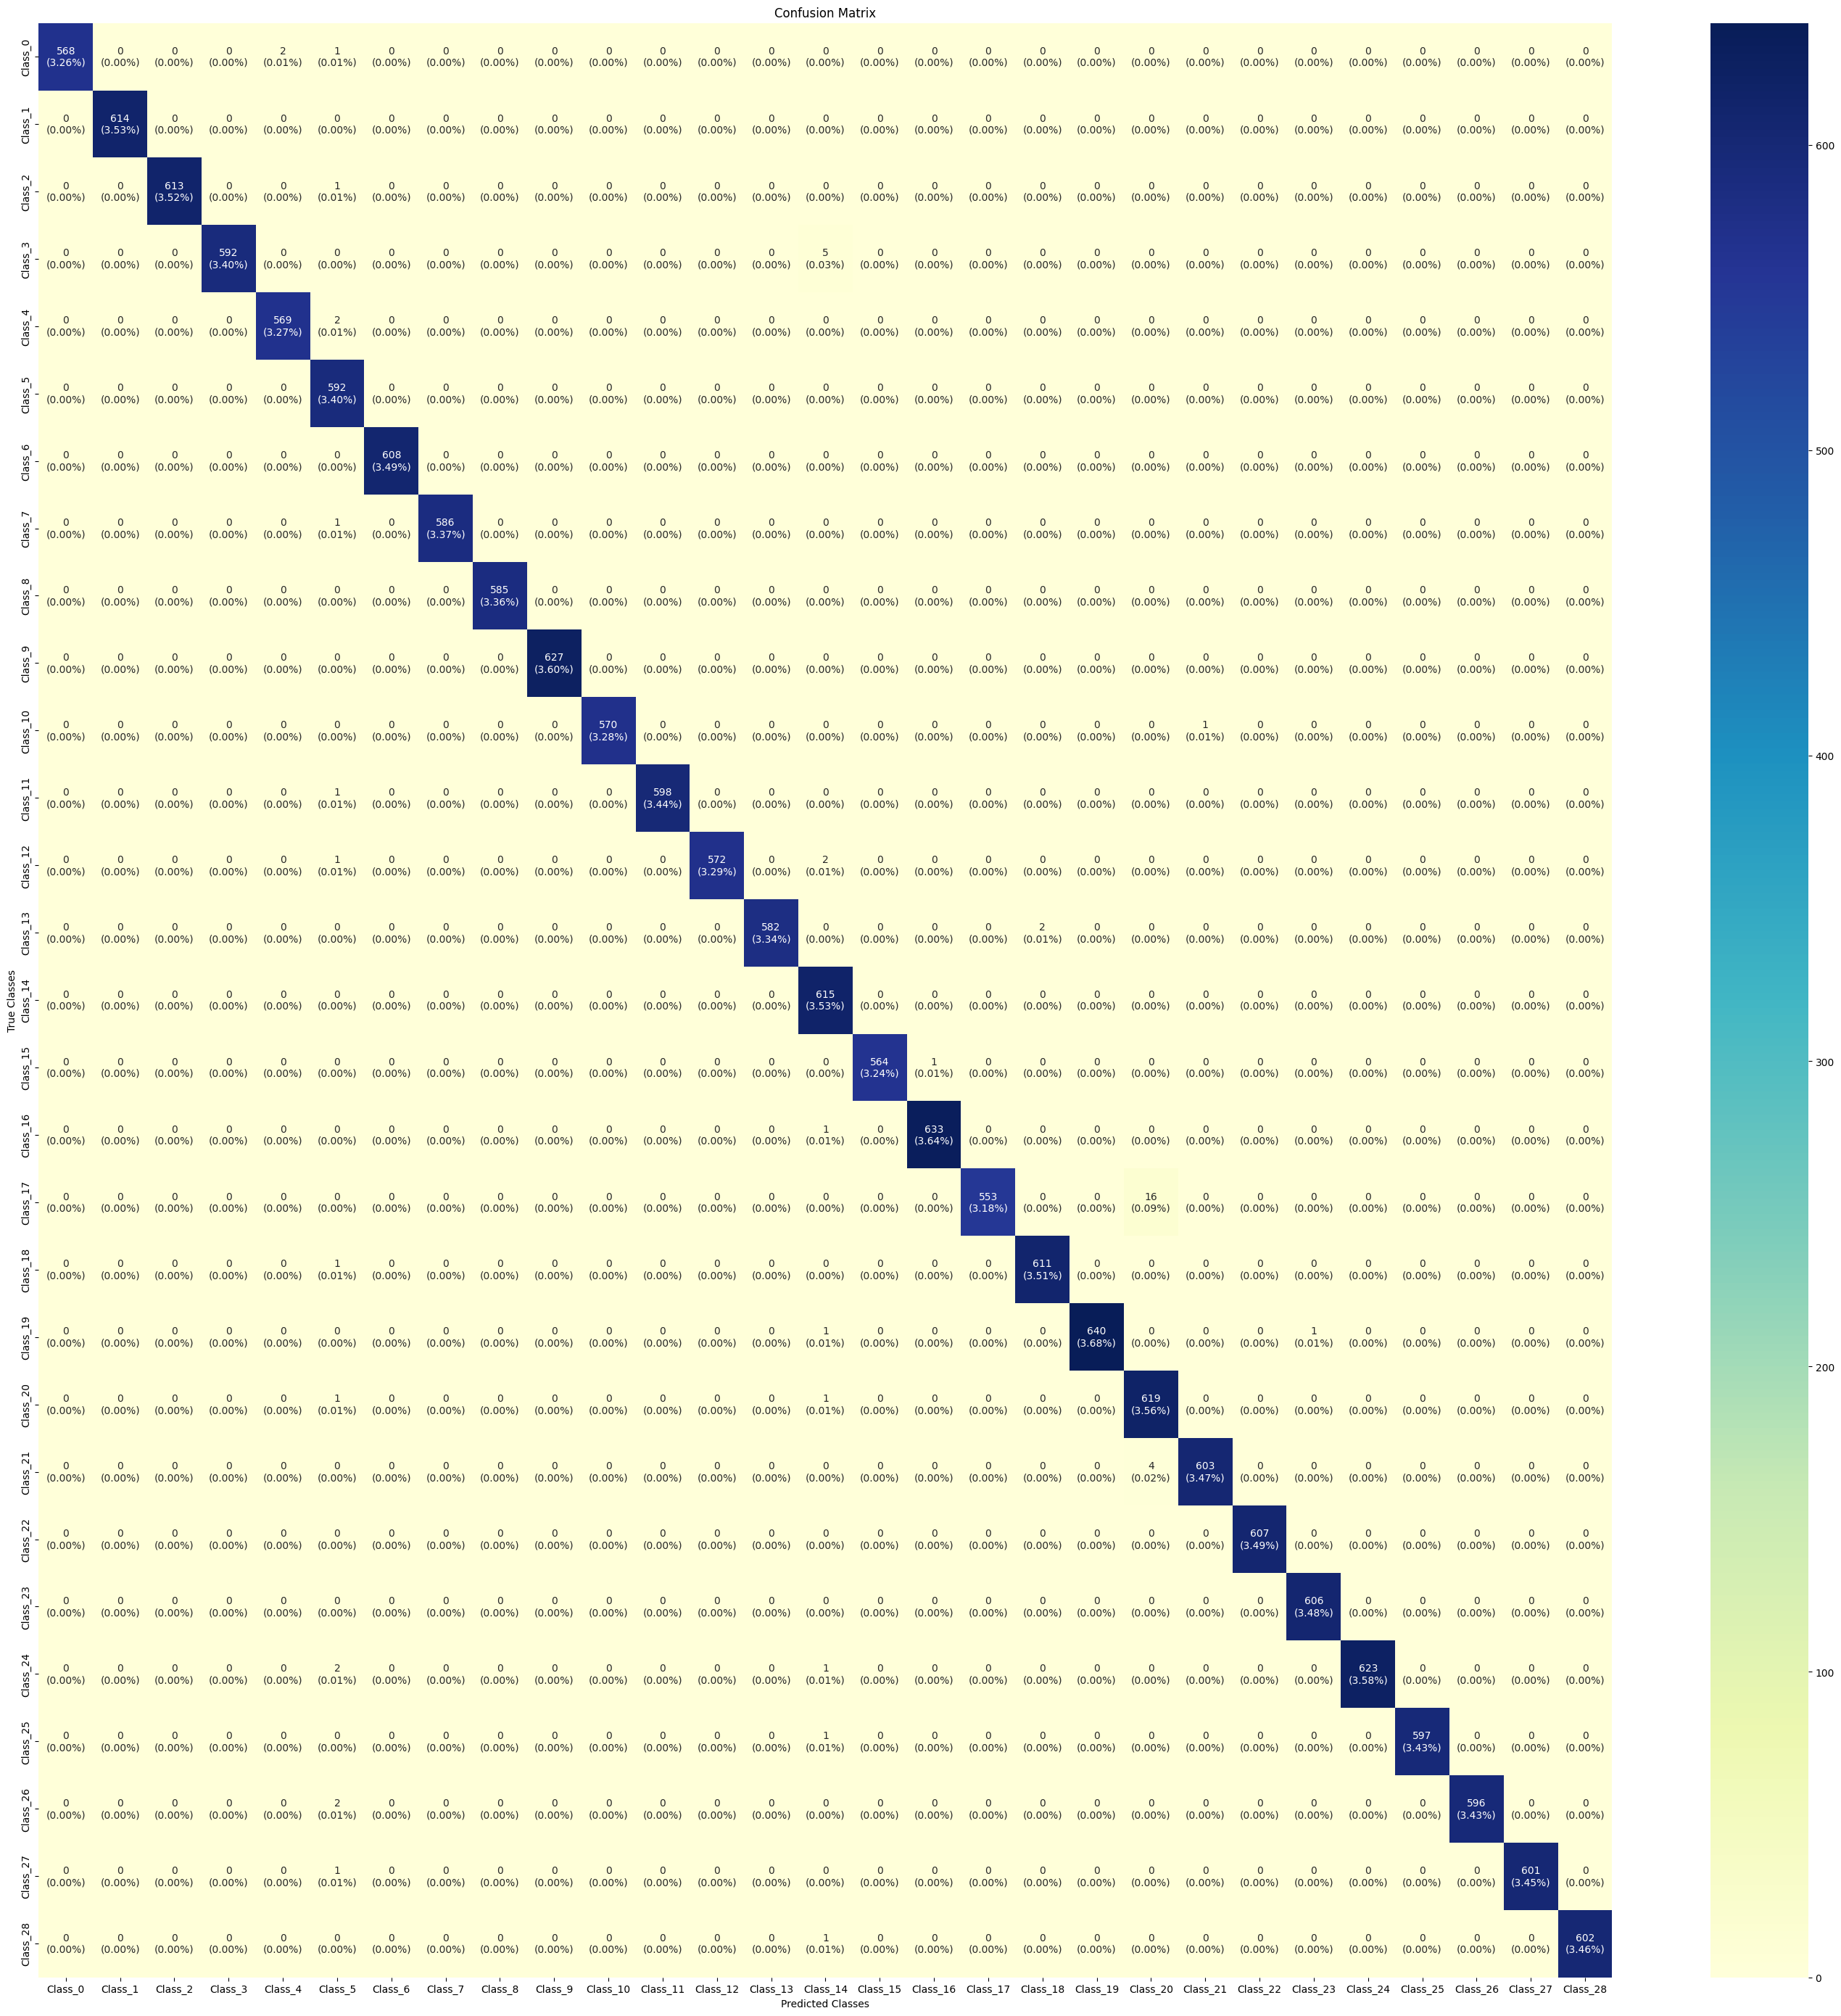

In [13]:
cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = [f'Class_{i}' for i in range(29)]

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(35, 35))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       571
           1       1.00      1.00      1.00       614
           2       1.00      1.00      1.00       614
           3       1.00      0.99      1.00       597
           4       1.00      1.00      1.00       571
           5       0.98      1.00      0.99       592
           6       1.00      1.00      1.00       608
           7       1.00      1.00      1.00       587
           8       1.00      1.00      1.00       585
           9       1.00      1.00      1.00       627
          10       1.00      1.00      1.00       571
          11       1.00      1.00      1.00       599
          12       1.00      0.99      1.00       575
          13       1.00      1.00      1.00       584
          14       0.98      1.00      0.99       615
          15       1.00      1.00      1.00       565
          16       1.00      1.00      1.00       634
          17       1.00    

In [5]:
## to free some space in the ram
import gc
#del predictions
#del y_pred
#del y_true
del images
del labels
#del history
gc.collect()

53

In [6]:
from sklearn.model_selection import KFold
import numpy as np

num_folds = 10

kfold = KFold(n_splits=num_folds, shuffle=True)

acc_per_fold = [] ## accuacrcy for each fold
loss_per_fold = [] ## Loss for each fold

inputs = np.concatenate((X_train, X_test), axis=0) ## inputs = images
targets = np.concatenate((Y_train, Y_test), axis=0) ##targets = labels

fold_no = 1
for train, test in kfold.split(inputs, targets):
    optimizer = Adam(learning_rate=0.001)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
    
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(64, 64, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=29, activation='softmax')
    ])
        
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    
    print(f'Training fold {fold_no} ...')
    
    model_Fold = model.fit(inputs[train], targets[train], epochs=15, validation_split = 0.05,
                       verbose=1,
                       callbacks=[reduce_lr])
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    ##model.metrics_names[0] -> loss
    ##model.metrics_names[1] -> accuarcy
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    del model
    del model_Fold
    del scores
    
    gc.collect()

    fold_no = fold_no + 1

Training fold 1 ...
Epoch 1/15
2325/2325 [==============================] - 28s 8ms/step - loss: 0.9918 - accuracy: 0.6959 - val_loss: 0.3837 - val_accuracy: 0.9193 - lr: 0.0010
Epoch 2/15
2325/2325 [==============================] - 19s 8ms/step - loss: 0.2401 - accuracy: 0.9226 - val_loss: 0.6088 - val_accuracy: 0.9545 - lr: 0.0010
Epoch 3/15
2325/2325 [==============================] - 19s 8ms/step - loss: 0.1519 - accuracy: 0.9539 - val_loss: 0.7671 - val_accuracy: 0.9594 - lr: 0.0010
Epoch 4/15
2325/2325 [==============================] - 19s 8ms/step - loss: 0.1186 - accuracy: 0.9670 - val_loss: 1.3166 - val_accuracy: 0.9425 - lr: 0.0010
Epoch 5/15
2325/2325 [==============================] - 19s 8ms/step - loss: 0.1045 - accuracy: 0.9735 - val_loss: 2.6275 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 6/15
2325/2325 [==============================] - 19s 8ms/step - loss: 0.0928 - accuracy: 0.9776 - val_loss: 1.4089 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 7/15
2325/2325 [==========

In [7]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.01590103469789028 - Accuracy: 99.9885082244873%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0161250289529562 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.018438883125782013 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.016045182943344116 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.01594303734600544 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.015534722246229649 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 7 - Loss: 0.01685517467558384 - Accuracy: 99.

**Trying to classify the testing folder**

In [26]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'s':26,'d':27,'n':28}

images = []
labels = []
size = 64,64

for image in os.listdir(test_dir):
    temp_img = cv2.imread(test_dir + '/' + image)
    temp_img = cv2.resize(temp_img, size)
    images.append(temp_img)
    labels.append(labels_dict[image[0]])
    
images = np.array(images)
images = images.astype('float32')/255.0 ## normalize the images
labels = keras.utils.to_categorical(labels) ##covert the classes to understandable catagories for model

In [27]:
test_loss, test_accuracy = model.evaluate(images,labels)

1/1 [==============================] - 0s 25ms/step - loss: 0.0165 - accuracy: 1.0000


In [28]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.01649506203830242
Test Accuracy: 1.0


In [32]:
predictions = model.predict(images)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(labels, axis=1)

1/1 [==============================] - 0s 19ms/step


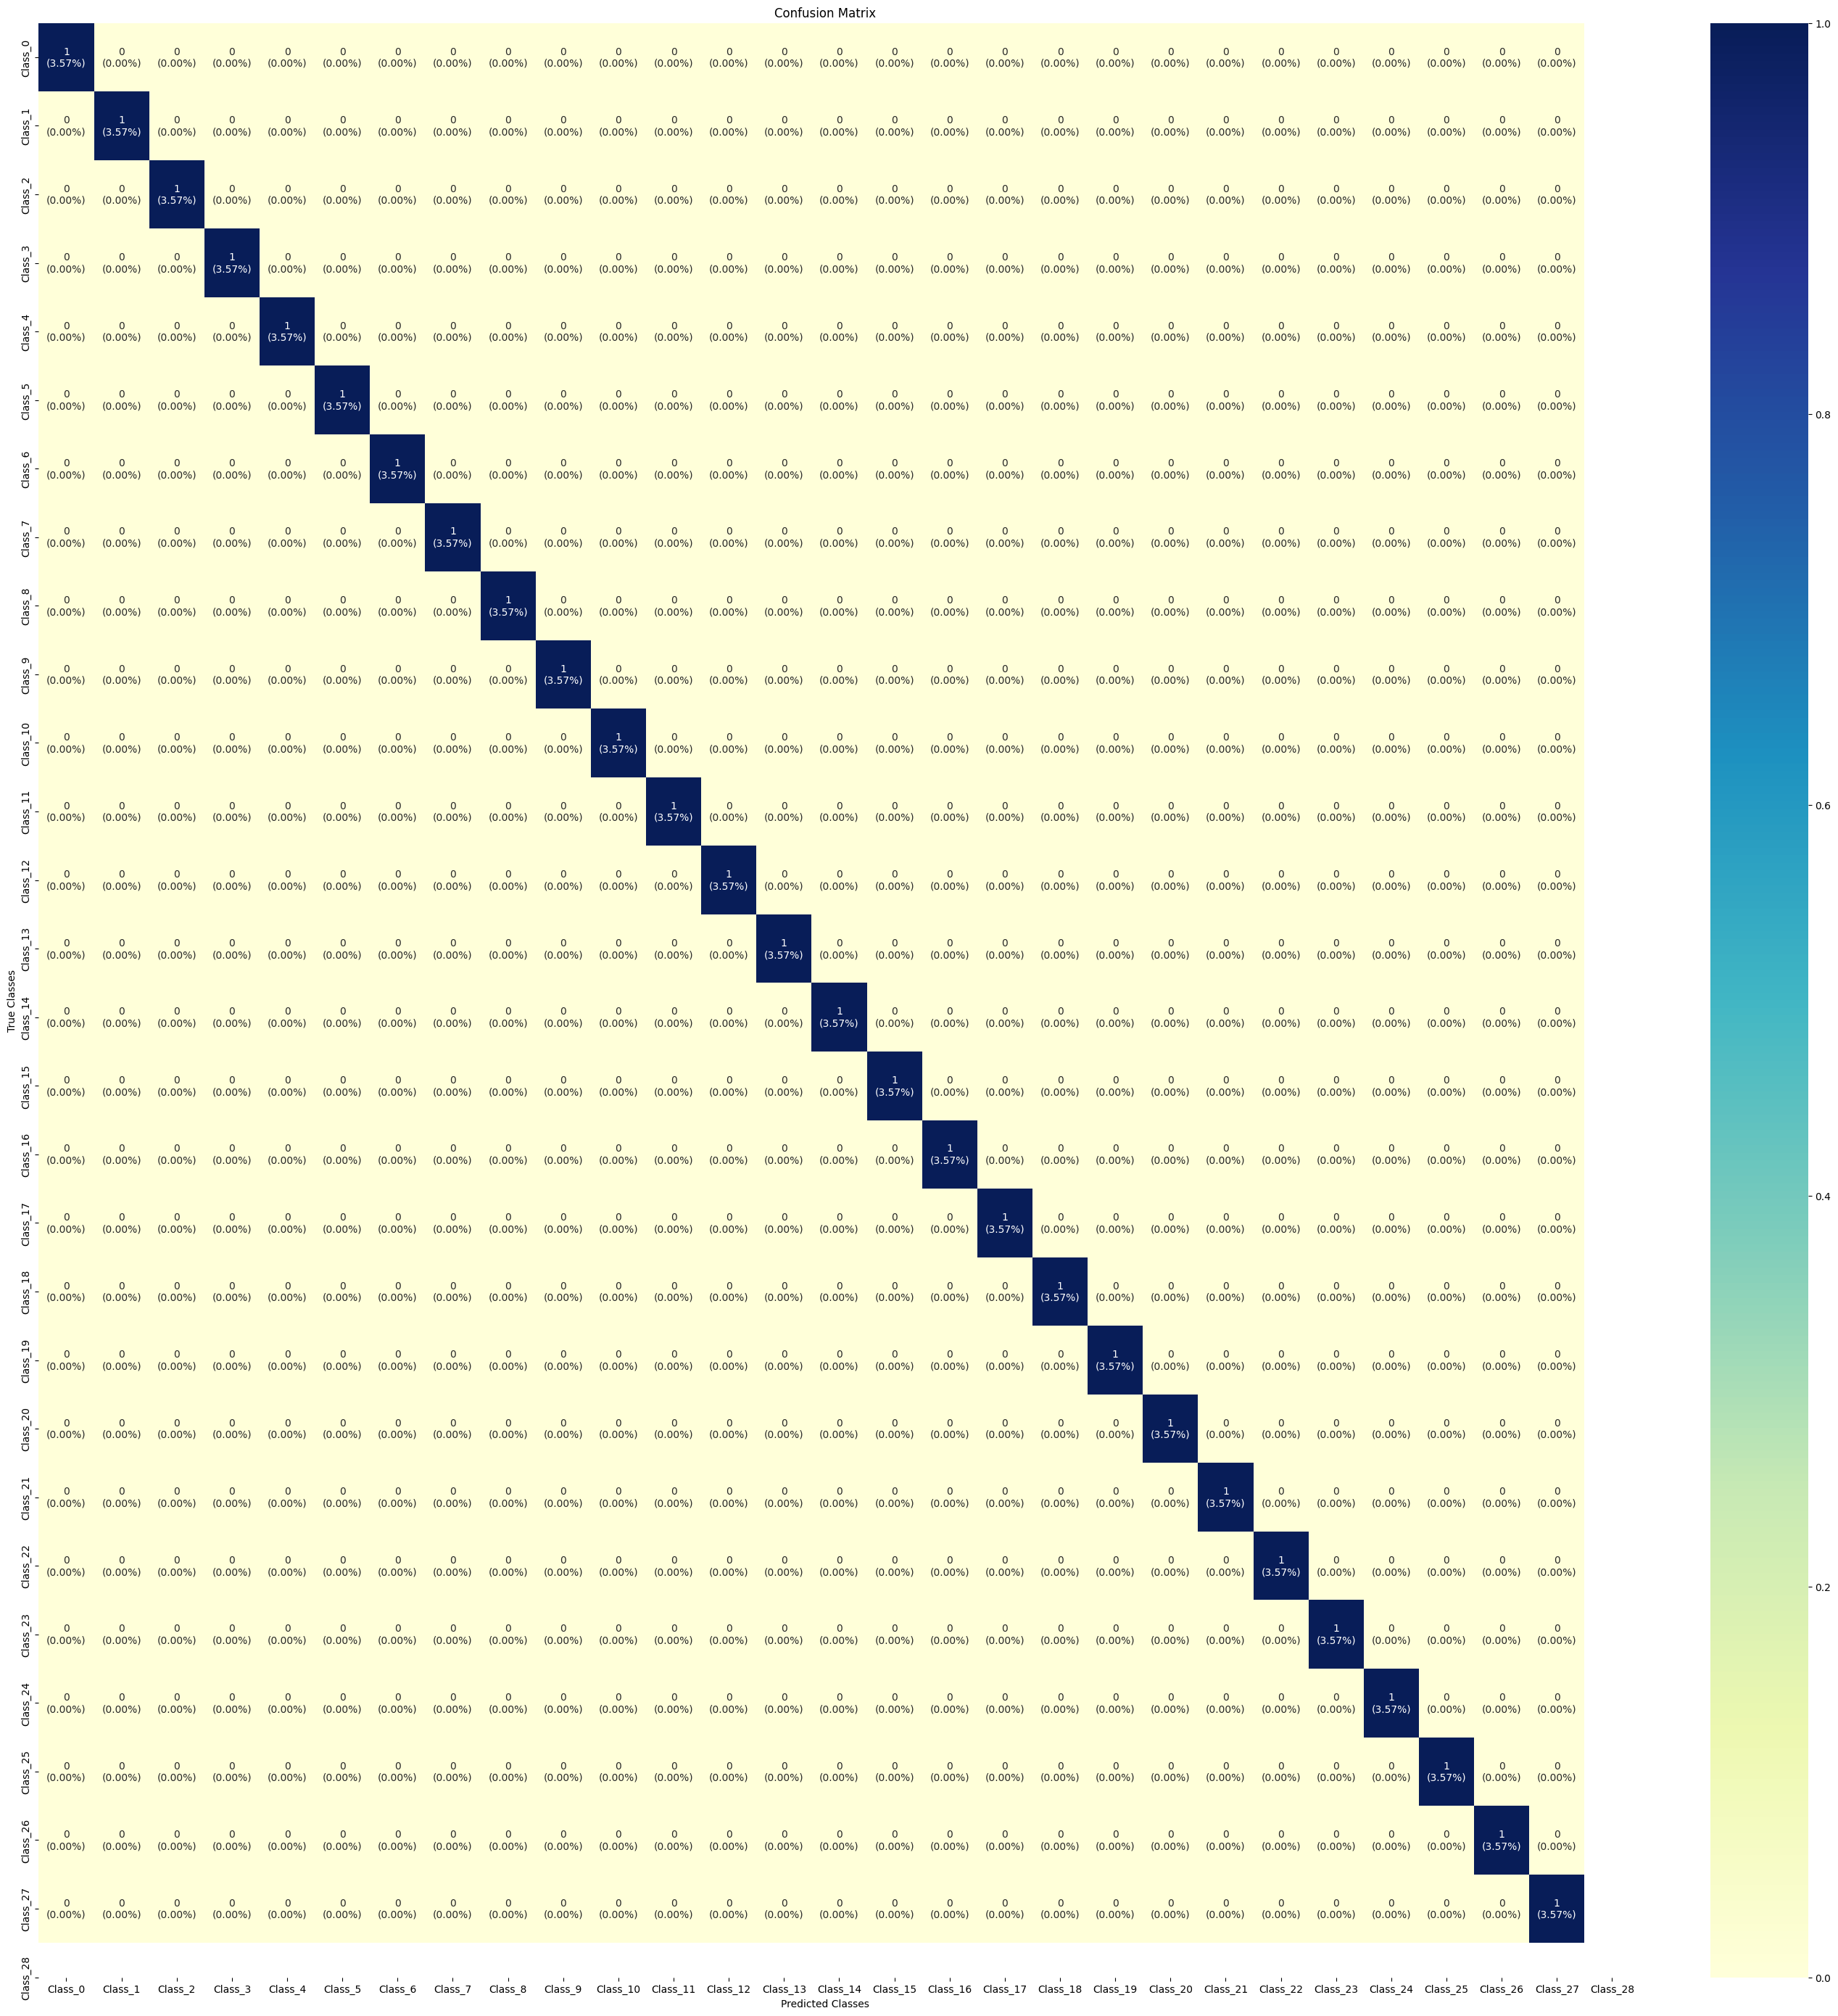

In [33]:
cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = [f'Class_{i}' for i in range(29)]

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(35, 35))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()